# Assignment 7
## name : rocky kim 
## student id : 20152424
## github link :[https://github.com/Epicevent/assignment07](https://github.com/Epicevent/assignment07 ) 

# x  : x-coordinate data
# y : (noisy) y-coordinate data

$$
    y  =  |x| \sin(x) + noisevalue
$$

# Make Noisy Data by given code and Plot noisy

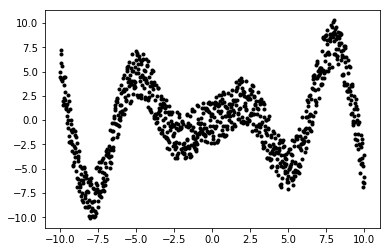

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

num     = 1001
std     = 5 


def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)
y      = y1 + nn * std # noisy data

plt.plot( x, y,'k.')
plt.show()

# Mathematic model for polynomial fitting with degree p



# definition of colunm vector $a_i$


$$
     a_i=
  \left[ {\begin{array}{ccccc}
   (x_1)^i \\
   (x_2)^i \\
   \vdots \\
   (x_n)^i 
  \end{array} } \right]
$$




# definition of p-degree Matrix


$$
   A_p=
  \left[ {\begin{array}{ccccc}
   a_0 & a_1 & \dots & a_p 
  \end{array} } \right]
$$
  
$$
  b=  \left[ {\begin{array}{ccccc}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n 
  \end{array} } \right]
$$



# model parameter 

$$
\theta =  \left[ {\begin{array}{ccccc}
  \theta_0 \\
  \theta_1 \\  
  \vdots \\
  \theta_p
  \end{array} } \right] 
$$




# make Least Square problem We want to minimize 

$$ 
\| A\theta - b   \|^2 = \sum_{j=1}^{n}{r_j^2} \quad where, \quad r_j = y_j -\tilde{f}(x_j)
$$



$$
    \tilde{f}(x) = \theta_0x^0 + \theta_1x^1 + · · · + \theta_px^p   
$$



$$
    A_p \theta = 
   \left[ {\begin{array}{ccccc}
  \tilde{f}(x_0) \\
   \tilde{f}(x_1) \\  
  \vdots \\
    \tilde{f}(x_n)
  \end{array} } \right]
$$


In [8]:
pset = np.array([0,1,2,3,4,5,6,7,8,9]) # set all test case of  polynomial degree 

def makeA_p( p,x):
    num = np.shape(x)[0]
    a0 = np.ones(num) # first column of A
    if p==0:
        numdata = np.shape(a0)[0]
        a0 = a0.reshape((numdata, 1))
    for i in range(1,p+1):
        x_i =x**i
        a0 = np.column_stack((a0,x_i))
    A= a0
    return A

# Solution of the least square problem 

$$
   \left[ {\begin{array}{ccccc}
   \theta_0 \\
   \theta_1 \\
   \vdots \\
   \theta_p
  \end{array} } \right]=(A^T A)^{-1}A^Tb 
$$

# Caculate 

$$ \| A
   \left[ {\begin{array}{ccccc}
   \theta_0 \\
   \theta_1 \\
   \vdots \\
   \theta_p
  \end{array} } \right] - b   \|^2
$$

# and

$$
\theta_0,\theta_1, \dots ,\theta_p 
$$

# Find an optimal set of model parameters that provide the least square approximate solution and Plot Clean Data

p= 0 : theta = ( 0.000, )
p= 1 : theta = ( -0.000, 0.209, )
p= 2 : theta = ( -0.021, 0.209, 0.001, )
p= 3 : theta = ( -0.021, -0.086, 0.001, 0.005, )
p= 4 : theta = ( -0.019, -0.086, 0.000, 0.005, 0.000, )
p= 5 : theta = ( -0.019, -1.431, 0.000, 0.068, 0.000, -0.001, )
p= 6 : theta = ( -0.024, -1.431, 0.001, 0.068, -0.000, -0.001, 0.000, )
p= 7 : theta = ( -0.024, 0.478, 0.001, -0.104, -0.000, 0.003, 0.000, -0.000, )
p= 8 : theta = ( -0.066, 0.478, 0.017, -0.104, -0.001, 0.003, 0.000, -0.000, -0.000, )
p= 9 : theta = ( -0.066, 2.208, 0.017, -0.357, -0.001, 0.013, 0.000, -0.000, -0.000, 0.000, )


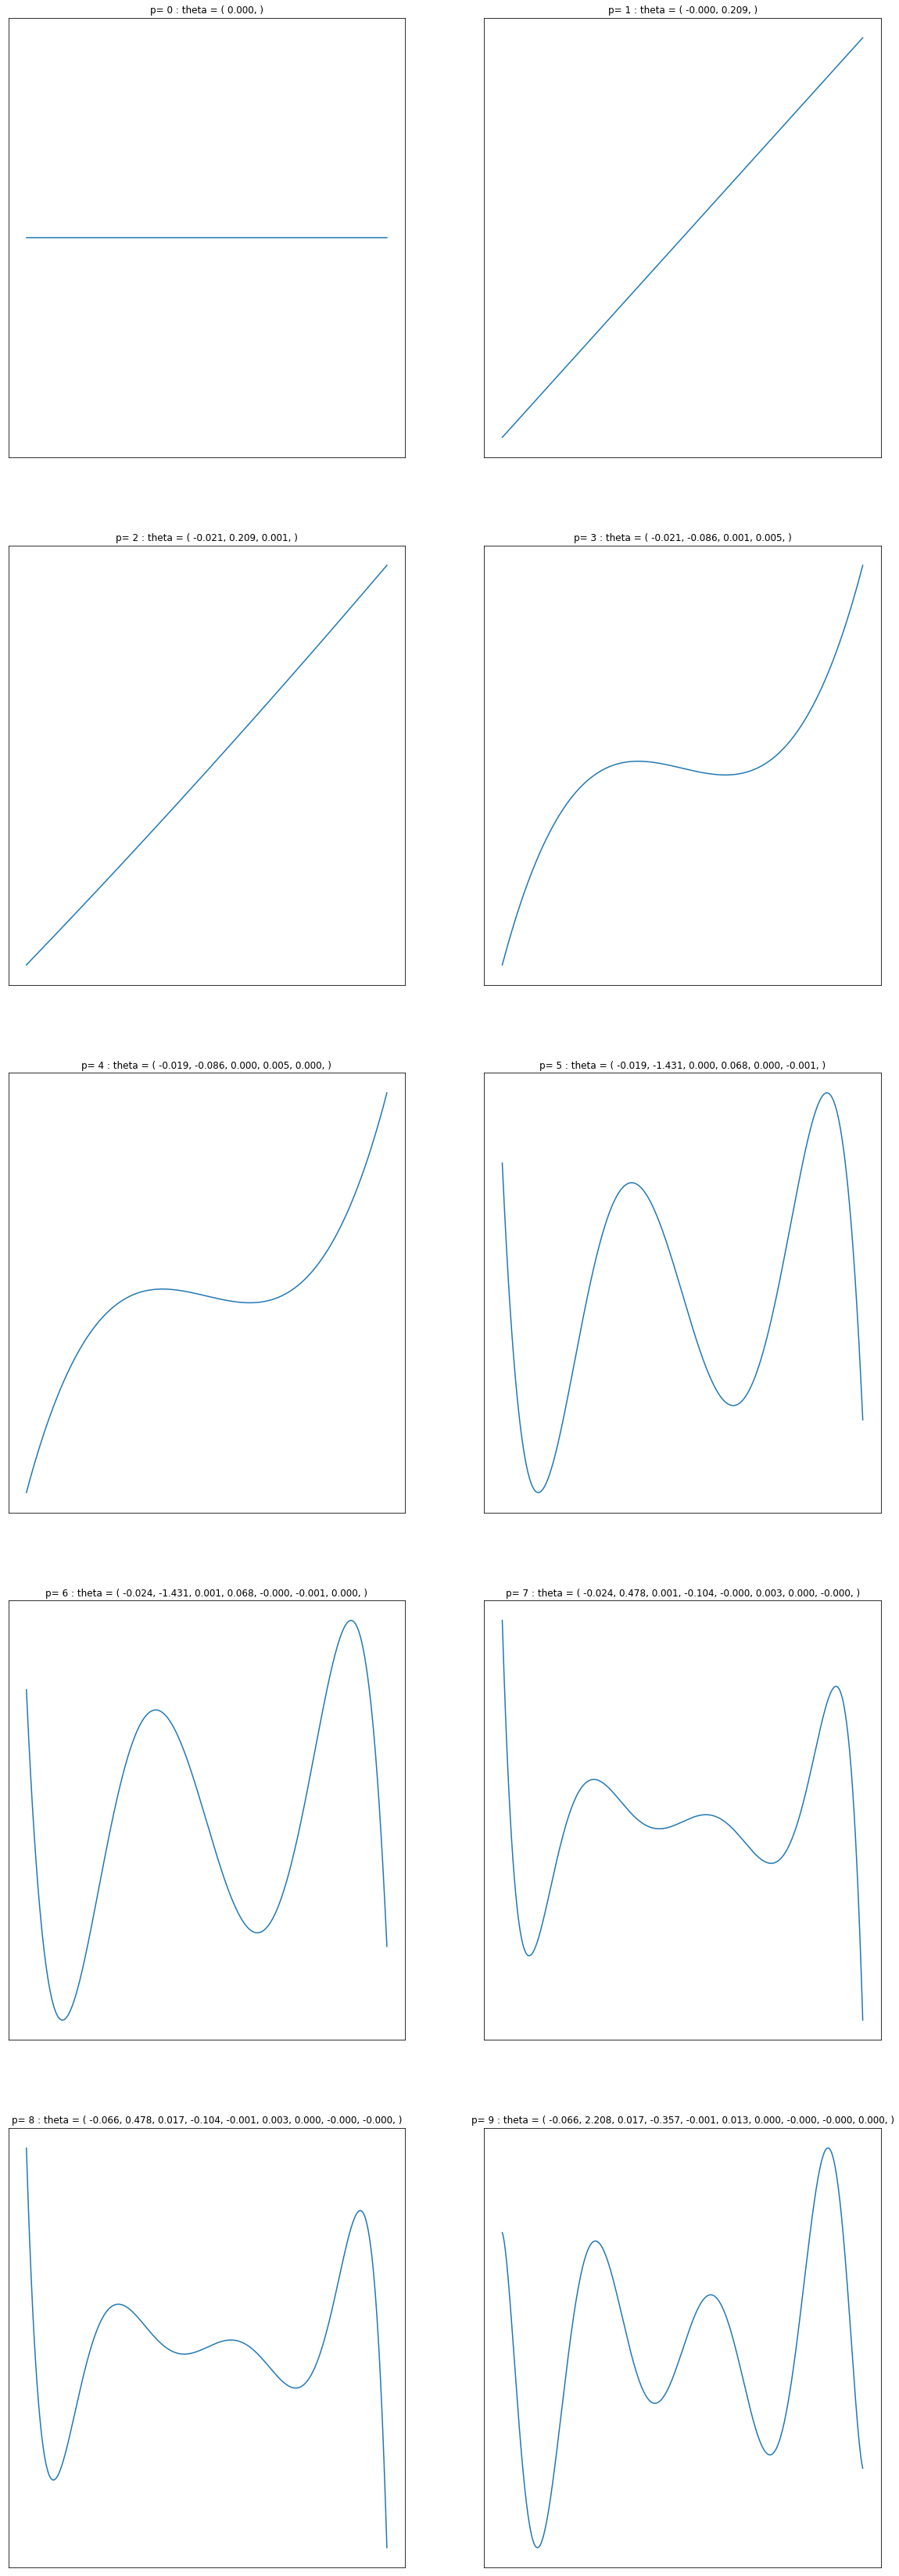

In [9]:
fig = plt.figure(figsize=(20,60))
error = list()
clean_y =list()
titlelist= list()
for i in range(10):
    plt.subplot(5, 2, i+1)
    
    A = makeA_p(i,x)
    noisy_y =y 
    numdata = np.shape(noisy_y)[0]
    transposednoisy_y = noisy_y.reshape((numdata, 1))
    ATA =np.matmul(A.T, A)
    invATA = inv(ATA)
    C = np.matmul(invATA, A.T)# C Matmul noise_ = theta_0, theta_1 , ... 
    thetavector = np.matmul(C,transposednoisy_y )
    theEnergy = np.matmul(((np.matmul(A,thetavector))-transposednoisy_y).T,
                      ((np.matmul(A,thetavector))-transposednoisy_y))
    error.append(theEnergy[0][0])
    clean_y.append((np.matmul(A,thetavector)).reshape(-1,) ) # clean
    plt.plot(x, clean_y[i])
    title= "p= "+str(i)
    title+=" : theta = ( "
    for j in range(i+1):
        title+=str("{:.3f}".format (thetavector[j,0])) +", "
    title+=")"
    titlelist.append(title)
    plt.title(title)
    print(title)
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Plot the polynomial curves that fit the noisy data 

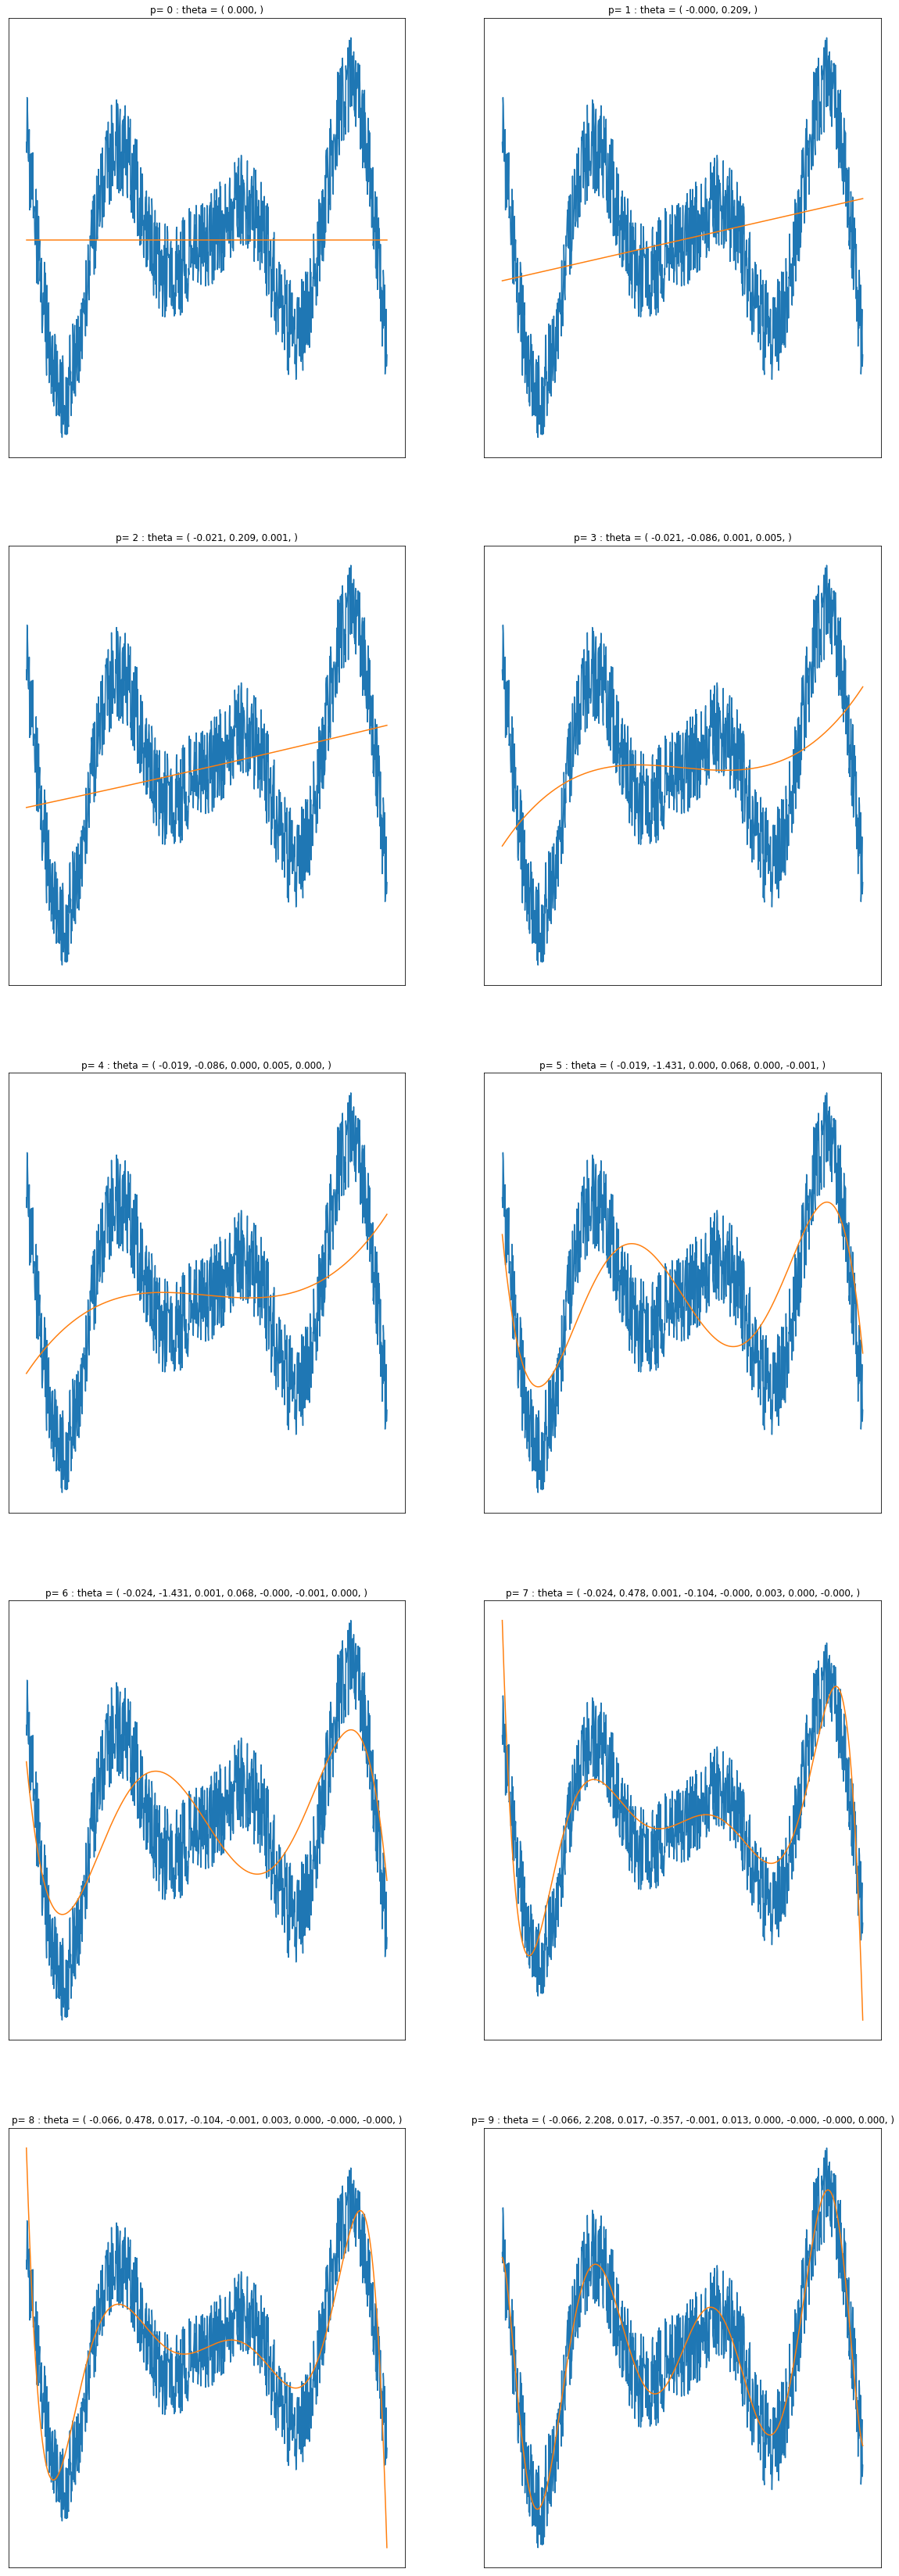

In [10]:
fig = plt.figure(figsize=(20,60))
for i in range(10):
    plt.subplot(5, 2, i+1)
    noisy_y =y 
    plt.plot(x,noisy_y)# noisy
    plt.plot(x, clean_y[i])#clean
    plt.title(titlelist[i])
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Plot the error 

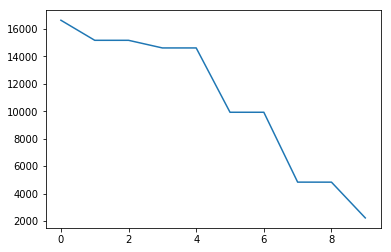

In [11]:
px = [0 ,1 ,2 ,3,4,5,6,7,8,9]
py = [error[0] , error[1],error[2],error[3],error[4],error[5],error[6],error[7],error[8],error[9]]
fig2 = plt.figure(2)
plt.plot(px,py ) #line fit
plt.show()

# print error

In [12]:
print("( ",end="")
for i in range(10):
    print("{:.5f}, ".format(py[i]),end="")
print(" )")

( 16628.12616, 15165.76554, 15165.39938, 14609.82105, 14609.81693, 9921.70831, 9921.68986, 4829.39178, 4827.99836, 2221.46462,  )


# conclusion 
## the minumum error in p= 9 
## the but its  leading coefficient is almost 0 ( it looks like  polynomial of degree 5 ) 